In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 
import warnings
warnings.filterwarnings('ignore')

In [2]:
stocks = ['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR']

In [3]:
def get_dates(lst, start_str, end_str):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(lst[0]))
    data = data.loc[(data['time']>=start_str)&(data['time']<end_str)]
    date = [datetime.fromisoformat(i[:10]) for i in data['time']]
    return(date)

In [4]:
def get_prices(lst,start_str, end_str):   
    new_list = []
    for i in lst:
        data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(i)) # read data from csv 注意文件夹路径和文件名
        df = data[['time','close']]                                          # get time and close price
        df.columns = ['date', i]                                       # change column names
        df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
        df = df.loc[(df['date']>=start_str)&(df['date']<end_str)]    # make sure date start from 2016-01-01
        df = df.reset_index(drop=True)
        new_list.append(df[i])
    return(new_list)

In [5]:
date = get_dates(stocks,'2015-01-01','2020-01-01')
prices = get_prices(stocks,'2015-01-01','2020-01-01')

In [6]:
stock_prices = pd.DataFrame(np.array(prices).T, columns=stocks , index=np.array(date).T)
stock_prices.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,1165.0,484.39999,469.20001,1383.0,612.00000,101.600000,908.29999,2235.5,2970.0,2848.0,188.00000,134.89999,2606.0
2015-01-05,1182.0,470.79999,462.00000,1369.5,603.90002,101.400000,909.70001,2128.5,2883.5,2832.0,181.60001,133.80000,2573.0
2015-01-06,1109.0,464.00000,456.70001,1357.0,593.70001,94.400000,896.79999,2121.0,2944.5,2784.0,178.80000,131.10001,2574.0
2015-01-07,1109.0,463.29999,462.70001,1379.0,601.00000,95.159998,917.50000,2148.5,2962.5,2800.0,182.00000,132.39999,2591.0
2015-01-08,1131.0,483.20001,468.89999,1427.5,606.20001,97.000000,932.40002,2200.0,3027.5,2849.0,209.25000,132.80000,2668.0


In [7]:
stock_prices.tail()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2019-12-23,2433.0,420.39999,577.79999,1815.0,599.00000,832.00000,965.70001,2259.0,4559.0,9065.0,253.00000,191.50000,4429.0
2019-12-24,2437.0,422.60001,578.79999,1817.6,599.40002,834.40002,959.20001,2275.5,4535.0,9055.0,253.39999,192.60001,4389.5
2019-12-27,2446.0,422.20001,579.59998,1818.8,597.79999,844.20001,961.29999,2271.0,4548.5,9125.0,256.00000,194.45000,4416.0
2019-12-30,2405.0,420.20001,566.79999,1798.0,596.29999,832.20001,953.50000,2247.5,4507.0,9020.0,255.50000,194.00000,4373.0
2019-12-31,2414.0,418.70001,564.79999,1779.0,591.90002,837.40002,944.29999,2239.5,4503.0,8890.0,255.20000,193.39999,4350.5


#### Using df to facilitate following steps

In [8]:
df = stock_prices

In [9]:
# Log of percentage change, methods: .pct_change()  and  np.log(1+x)
# covariance : .cov()
# 但cov对彼此间的强弱关系度量magnitude不是很直观 
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix.head(2)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.000365,0.000125,0.000100,0.000065,0.000106,0.000090,0.000026,0.000107,0.000154,0.000121,0.000072,0.000120,0.000047
AV,0.000125,0.000228,0.000079,0.000045,0.000102,0.000104,0.000032,0.000084,0.000107,0.000080,0.000106,0.000175,0.000039


#### .corr() directly check the correlations among stocks

In [10]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,1.000000,0.434803,0.417014,0.290717,0.436607,0.244262,0.118947,0.367530,0.404094,0.463824,0.215066,0.294437,0.199265
AV,0.434803,1.000000,0.417631,0.254827,0.532805,0.356912,0.182602,0.366520,0.356894,0.386856,0.398520,0.543614,0.210840
BA,0.417014,0.417631,1.000000,0.342460,0.414851,0.268178,0.236787,0.318709,0.261586,0.397079,0.254599,0.279482,0.278481
GSK,0.290717,0.254827,0.342460,1.000000,0.403616,0.110220,0.404499,0.414190,0.248392,0.268376,0.212822,0.088955,0.493697
HSBA,0.436607,0.532805,0.414851,0.403616,1.000000,0.181023,0.225660,0.490728,0.461333,0.364301,0.291741,0.245846,0.315599
JD,0.244262,0.356912,0.268178,0.110220,0.181023,1.000000,0.149149,0.138287,0.084630,0.224655,0.216110,0.422770,0.132653
NG,0.118947,0.182602,0.236787,0.404499,0.225660,0.149149,1.000000,0.267643,0.100540,0.169696,0.164966,0.180382,0.442108
RDSB,0.367530,0.366520,0.318709,0.414190,0.490728,0.138287,0.267643,1.000000,0.533041,0.315437,0.290133,0.095333,0.306044
RIO,0.404094,0.356894,0.261586,0.248392,0.461333,0.084630,0.100540,0.533041,1.000000,0.297212,0.269905,0.135020,0.146363
SPX,0.463824,0.386856,0.397079,0.268376,0.364301,0.224655,0.169696,0.315437,0.297212,1.000000,0.233928,0.230442,0.304028


#### create weights for the portfolio

In [11]:
weights = np.full(shape=len(stocks), fill_value=1/len(stocks), dtype=np.float)
colnames = df.columns

print(weights,colnames)

[0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308] Index(['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX',
       'TSCO', 'TW', 'ULVR'],
      dtype='object')


#### calculate portfolio variance

In [12]:
port_weights = dict(zip(colnames,weights))

port_var = cov_matrix.mul(port_weights, axis=0).mul(port_weights, axis=1).sum().sum()

port_var # seems like the variance of the portfolio is very low

8.279508798695496e-05

#### calculate each stocks' mean return in certain amount of years

In [13]:
df.resample('Y').last()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-12-31,1119.0,516.00000,499.60001,1373.0,536.20001,208.20000,937.50000,1543.0,1979.5,3283.0,149.50000,203.10001,2926.5
2016-12-31,1580.0,486.39999,591.50000,1562.0,656.90002,317.89999,951.59998,2354.0,3158.5,4184.0,206.85001,153.50000,3292.5
2017-12-31,1992.0,506.50000,573.00000,1322.5,766.90002,336.20001,875.09998,2508.5,3942.0,5620.0,209.25000,206.39999,4125.5
2018-12-31,1637.0,375.50000,459.20001,1491.2,646.90002,348.79999,764.20001,2340.0,3730.0,6240.0,190.10001,136.25000,4108.5
2019-12-31,2414.0,418.70001,564.79999,1779.0,591.90002,837.40002,944.29999,2239.5,4503.0,8890.0,255.20000,193.39999,4350.5


In [14]:
stock_mean_return = df.resample('Y').last().pct_change().mean() 
stock_mean_return

AHT     0.242293
AV     -0.039908
BA      0.046008
GSK     0.076222
HSBA    0.037765
JD      0.505686
NG      0.010898
RDSB    0.120278
RIO     0.249281
SPX     0.288164
TSCO    0.161537
TW      0.044997
ULVR    0.108211
dtype: float64

#### calculate the portfolio returns, by adding the weights on each stock

这里有一个与之前计算不同的地方，按每年末价格计算，年均portfolio_return = 0.1424

但是，之前，按每天来做cumulative来计算，年均portfolio_return = 0.224

之前还用末年和初年，仅两年的数据算过一个数据，年均portfolio_return = 0.1467

### 第一个数据与第三个数据基本吻合，证明计算过程应该没有问题。是两种计算方式，产生了差距。需要继续验证那种方式更加准确。

In [15]:
portfolio_return = (weights * stock_mean_return).sum()
portfolio_return

0.14241779270863694

#### calculate volatility is given by the annual standard deviation. Multiply by 250 because there are 250 trading days/year.

In [16]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AHT     0.301952
AV      0.238651
BA      0.198753
GSK     0.186321
HSBA    0.201516
JD      0.304766
NG      0.181236
RDSB    0.241384
RIO     0.314986
SPX     0.215461
TSCO    0.277396
TW      0.336443
ULVR    0.194253
dtype: float64

#### Creating a table for visualising returns and volatility of assets


In [17]:
assets = pd.concat([stock_mean_return, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets 

,Returns,Volatility
AHT,0.242293,0.301952
AV,-0.039908,0.238651
BA,0.046008,0.198753
GSK,0.076222,0.186321
HSBA,0.037765,0.201516
JD,0.505686,0.304766
NG,0.010898,0.181236
RDSB,0.120278,0.241384
RIO,0.249281,0.314986
SPX,0.288164,0.215461


#### Plotting the efficient frontier

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.


In [18]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights,cumulative sum must be 1

num_assets = len(df.columns)
num_portfolios = 10000 # Run 10000 times

In [19]:
weights = np.random.random(num_assets)
# weights = weights/np.sum(weights)
# p_weights.append(weights)

In [20]:
len(df.columns)

13

In [21]:
(weights/weights.sum()).sum()

1.0000000000000002

In [22]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, stock_mean_return) # Returns are the product of individual expected returns of asset and its weights
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
# 10000 times needs approximately 15 seconds

In [23]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [24]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AHT weight,AV weight,BA weight,GSK weight,HSBA weight,JD weight,NG weight,RDSB weight,RIO weight,SPX weight,TSCO weight,TW weight,ULVR weight
0,0.148868,0.155126,0.117466,0.121735,0.029449,0.138220,0.083259,0.073643,0.024001,0.116526,0.118224,0.057235,0.044786,0.041926,0.033529
1,0.118351,0.149270,0.025793,0.094855,0.107943,0.047249,0.079640,0.098681,0.139120,0.036020,0.055870,0.015527,0.126154,0.141660,0.031488
2,0.124435,0.145139,0.104356,0.027212,0.141468,0.049859,0.047499,0.022142,0.126265,0.131918,0.119736,0.001882,0.097150,0.008115,0.122397
3,0.121997,0.144509,0.051081,0.112574,0.031917,0.070785,0.138191,0.028225,0.096325,0.149703,0.015444,0.170471,0.073499,0.044773,0.017011
4,0.139863,0.145574,0.070851,0.007353,0.080960,0.195495,0.033283,0.056884,0.023857,0.160763,0.050278,0.002417,0.175189,0.035162,0.107507


In [25]:
portfolios.describe()

,Returns,Volatility,AHT weight,AV weight,BA weight,GSK weight,HSBA weight,JD weight,NG weight,RDSB weight,RIO weight,SPX weight,TSCO weight,TW weight,ULVR weight
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.142464,0.147826,0.077396,0.076966,0.076704,0.076408,7.668567e-02,0.076665,0.077099,7.697021e-02,0.077303,0.076888,0.077254,0.076973,0.076689
std,0.023735,0.006261,0.044224,0.044343,0.044334,0.044293,4.421279e-02,0.044431,0.044255,4.414284e-02,0.044172,0.044280,0.044314,0.044229,0.044357
min,0.054362,0.130326,0.000015,0.000003,0.000001,0.000008,8.020028e-07,0.000001,0.000006,1.905367e-07,0.000002,0.000003,0.000001,0.000005,0.000005
25%,0.125914,0.143425,0.041026,0.040205,0.039830,0.039569,3.961200e-02,0.039511,0.040325,4.031162e-02,0.040792,0.040060,0.040520,0.039977,0.039915
50%,0.142419,0.147316,0.077564,0.076889,0.076571,0.076222,7.671311e-02,0.076555,0.077173,7.690623e-02,0.077604,0.076756,0.077422,0.077037,0.076519
75%,0.158674,0.151698,0.111447,0.111368,0.111015,0.110582,1.108624e-01,0.111093,0.111098,1.111294e-01,0.111501,0.111065,0.111495,0.111338,0.111091
max,0.252326,0.189083,0.265630,0.256952,0.261027,0.269638,3.183683e-01,0.275482,0.253659,3.012741e-01,0.352242,0.262810,0.267926,0.259893,0.281690


#### Find the maxium return portfolio

In [26]:
max_rtn = pd.DataFrame(portfolios.iloc[portfolios['Returns'].idxmax()])
max_rtn.iloc[:2]

,8035
Returns,0.252326
Volatility,0.159766


In [27]:
max_rtn.columns[0]

8035

In [28]:
max_rtn.iloc[2:].sort_values(by=[max_rtn.columns[0]], ascending=False)

,8035
JD weight,0.237621
SPX weight,0.190563
AHT weight,0.142865
TSCO weight,0.093752
RIO weight,0.081376
NG weight,0.080898
AV weight,0.065757
GSK weight,0.036776
ULVR weight,0.024810
RDSB weight,0.020377


#### Find the lowest volatility portfolio

In [29]:
min_vol = pd.DataFrame(portfolios.iloc[portfolios['Volatility'].idxmin()])
min_vol.iloc[:2]

,14632
Returns,0.106216
Volatility,0.130326


In [30]:
min_vol.iloc[2:].sort_values(by=[min_vol.columns[0]], ascending=False)

,14632
NG weight,0.179825
ULVR weight,0.158074
GSK weight,0.155508
BA weight,0.099152
TSCO weight,0.098167
SPX weight,0.076074
TW weight,0.059850
HSBA weight,0.041452
AV weight,0.041087
JD weight,0.032930


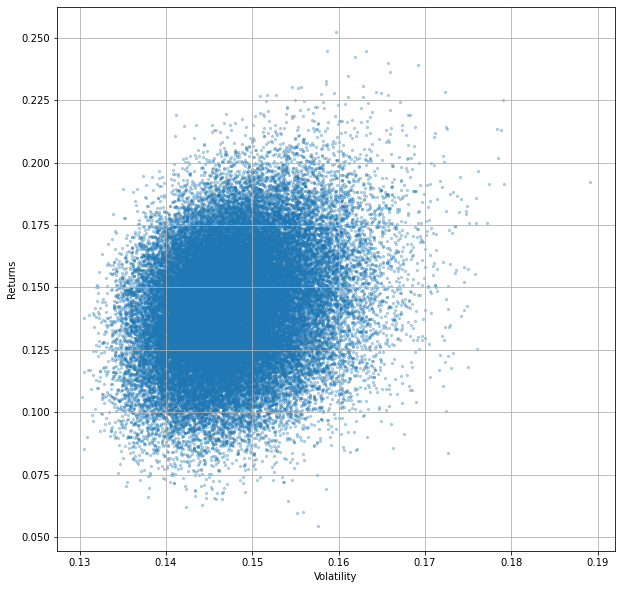

In [31]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=5, alpha=0.3, grid=True, figsize=[10,10]);

In [32]:
max_rtn.iloc[0]

8035    0.252326
Name: Returns, dtype: float64

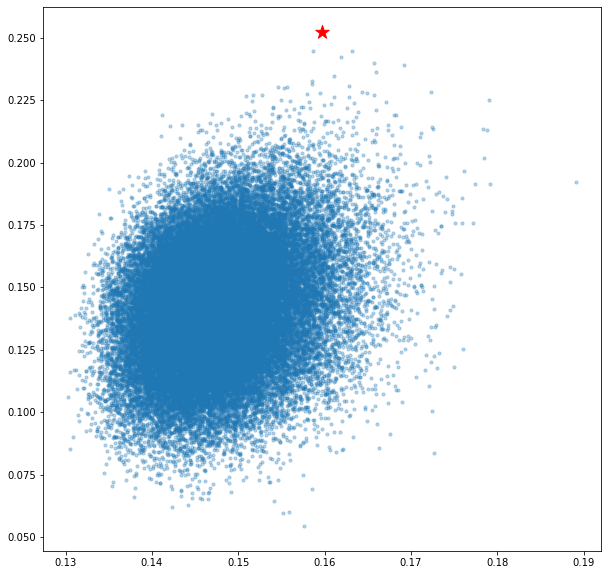

In [33]:
# plotting the maxium return portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(max_rtn.iloc[1], max_rtn.iloc[0], color='r', marker='*', s=200);

In [34]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.106216
Volatility     0.130326
AHT weight     0.024243
AV weight      0.041087
BA weight      0.099152
GSK weight     0.155508
HSBA weight    0.041452
JD weight      0.032930
NG weight      0.179825
RDSB weight    0.004447
RIO weight     0.029190
SPX weight     0.076074
TSCO weight    0.098167
TW weight      0.059850
ULVR weight    0.158074
Name: 14632, dtype: float64

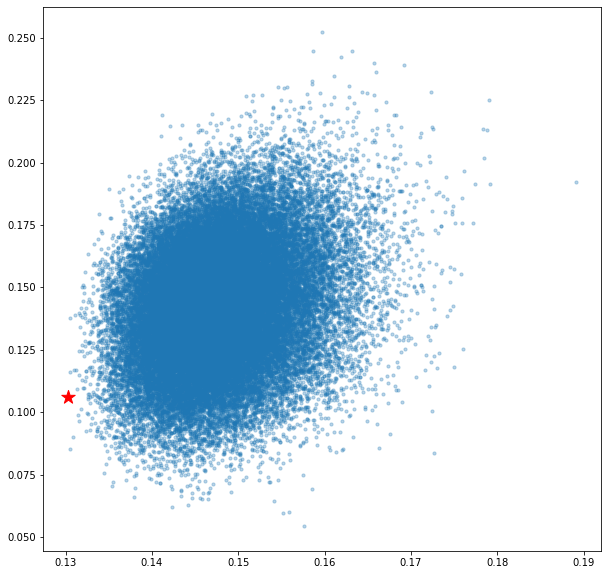

In [35]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);

#### Sharpe Ratio

Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.


In [36]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.252326
Volatility     0.159766
AHT weight     0.142865
AV weight      0.065757
BA weight      0.005023
GSK weight     0.036776
HSBA weight    0.017839
JD weight      0.237621
NG weight      0.080898
RDSB weight    0.020377
RIO weight     0.081376
SPX weight     0.190563
TSCO weight    0.093752
TW weight      0.002342
ULVR weight    0.024810
Name: 8035, dtype: float64

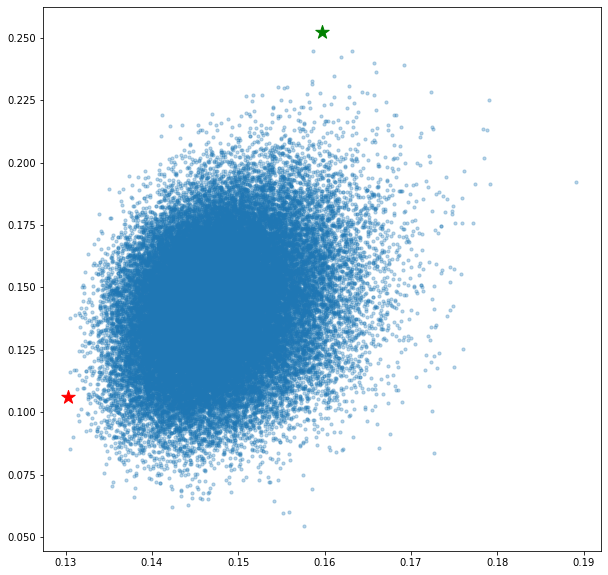

In [37]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=200);

In [38]:
optimal_risky_port = pd.DataFrame(optimal_risky_port)
optimal_risky_port.iloc[:2]

,8035
Returns,0.252326
Volatility,0.159766


In [39]:
optimal_risky_port.iloc[2:].sort_values(by = optimal_risky_port.columns[0], ascending=False)

,8035
JD weight,0.237621
SPX weight,0.190563
AHT weight,0.142865
TSCO weight,0.093752
RIO weight,0.081376
NG weight,0.080898
AV weight,0.065757
GSK weight,0.036776
ULVR weight,0.024810
RDSB weight,0.020377
